In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, RobustScaler, PolynomialFeatures, OneHotEncoder

In [2]:
df_cleaned = pd.read_csv('carprice_cleaned.csv')

## Modèle Basique

In [3]:
y = df_cleaned['price']
X = df_cleaned.drop(['price', "car_ID", "CarName"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

numeric_features = X.select_dtypes(include=['float', 'int']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# a l'aide de la classe ColumnTransformer, 
# on déclare à quelles variables on applique quel transformer
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ]
)

#On obtient un pipeline de preprocessing qu'on peut utiliser dans un pipeline d'entainement
linear = LinearRegression()

pipe = Pipeline([
     ('prep', preprocessor),
     ('linear', linear)
])

# Entraîner le modèle sur les données d'entraînement
pipe.fit(X_train, y_train)

# Évaluer la performance du modèle sur les données de test
score = pipe.score(X_test, y_test)
print(f"Score sur les données de test: {score:.3f}")

Score sur les données de test: 0.775


## MinMaxScaler et Ridge

In [4]:
y = df_cleaned['price']
X = df_cleaned.drop(['price', "car_ID", "CarName"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


numeric_features = X.select_dtypes(include=['float', 'int']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline([
        ('stdscaler', MinMaxScaler()),  # moyenne nulle et écart type = 1 -> Reg, SVM, PCA
        ])


categorical_transformer = OneHotEncoder(handle_unknown="ignore")


# a l'aide de la classe ColumnTransformer, 
# on déclare à quelles variables on applique quel transformer
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

#On obtient un pipeline de preprocessing qu'on peut utiliser dans un pipeline d'entainement
linear = LinearRegression()

# Définir un modèle de régression Ridge avec une valeur d'alpha de 1
ridge = Ridge(alpha=1)


pipe = Pipeline([
     ('prep', preprocessor),
     ('ridge', ridge)
])

# Entraîner le modèle sur les données d'entraînement
pipe.fit(X_train, y_train)

# Évaluer la performance du modèle sur les données de test
score = pipe.score(X_test, y_test)
print(f"Score sur les données de test: {score:.3f}")

Score sur les données de test: 0.882


In [5]:
from sklearn.model_selection import GridSearchCV

# Définir les paramètres pour la recherche de grille
param_grid = {'ridge__alpha': [0.1, 1, 10, 100]}

# Créer un objet GridSearchCV pour effectuer la recherche de grille
grid_search = GridSearchCV(pipe, param_grid, cv=5)

# Exécuter la recherche de grille sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le score correspondant
print("Meilleurs paramètres : {}".format(grid_search.best_params_))
print("Score sur les données de test : {:.3f}".format(grid_search.score(X_test, y_test)))

Meilleurs paramètres : {'ridge__alpha': 0.1}
Score sur les données de test : 0.885


## RobustScaler et Ridge

In [6]:
y = df_cleaned['price']
X = df_cleaned.drop(['price', "car_ID", "CarName"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


numeric_features = X.select_dtypes(include=['float', 'int']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline([
        ('robustscaler', RobustScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown="ignore")


# a l'aide de la classe ColumnTransformer, 
# on déclare à quelles variables on applique quel transformer
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

#On obtient un pipeline de preprocessing qu'on peut utiliser dans un pipeline d'entainement
linear = LinearRegression()

# Définir un modèle de régression Ridge avec une valeur d'alpha de 1
ridge = Ridge(alpha=1)


pipe = Pipeline([
     ('prep', preprocessor),
     ('ridge', ridge)
])

# Entraîner le modèle sur les données d'entraînement
trained_pipe=pipe.fit(X_train, y_train)

# Évaluer la performance du modèle sur les données de test
score = pipe.score(X_test, y_test)
print(f"Score sur les données de test: {score:.3f}")

Score sur les données de test: 0.895


In [7]:
from sklearn.model_selection import GridSearchCV

# Définir les paramètres pour la recherche de grille
param_grid = {'ridge__alpha': [0.1, 1, 10, 100]}

# Créer un objet GridSearchCV pour effectuer la recherche de grille
grid_search = GridSearchCV(pipe, param_grid, cv=5)

# Exécuter la recherche de grille sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le score correspondant
print("Meilleurs paramètres : {}".format(grid_search.best_params_))
print("Score sur les données de test : {:.3f}".format(grid_search.score(X_test, y_test)))

Meilleurs paramètres : {'ridge__alpha': 1}
Score sur les données de test : 0.895


In [8]:
import pickle
with open('trained_pipeline.pkl', 'wb') as f:
    pickle.dump(trained_pipe, f)

In [9]:
from joblib import dump

dump(trained_pipe, 'trained_pipe.joblib')

['trained_pipe.joblib']

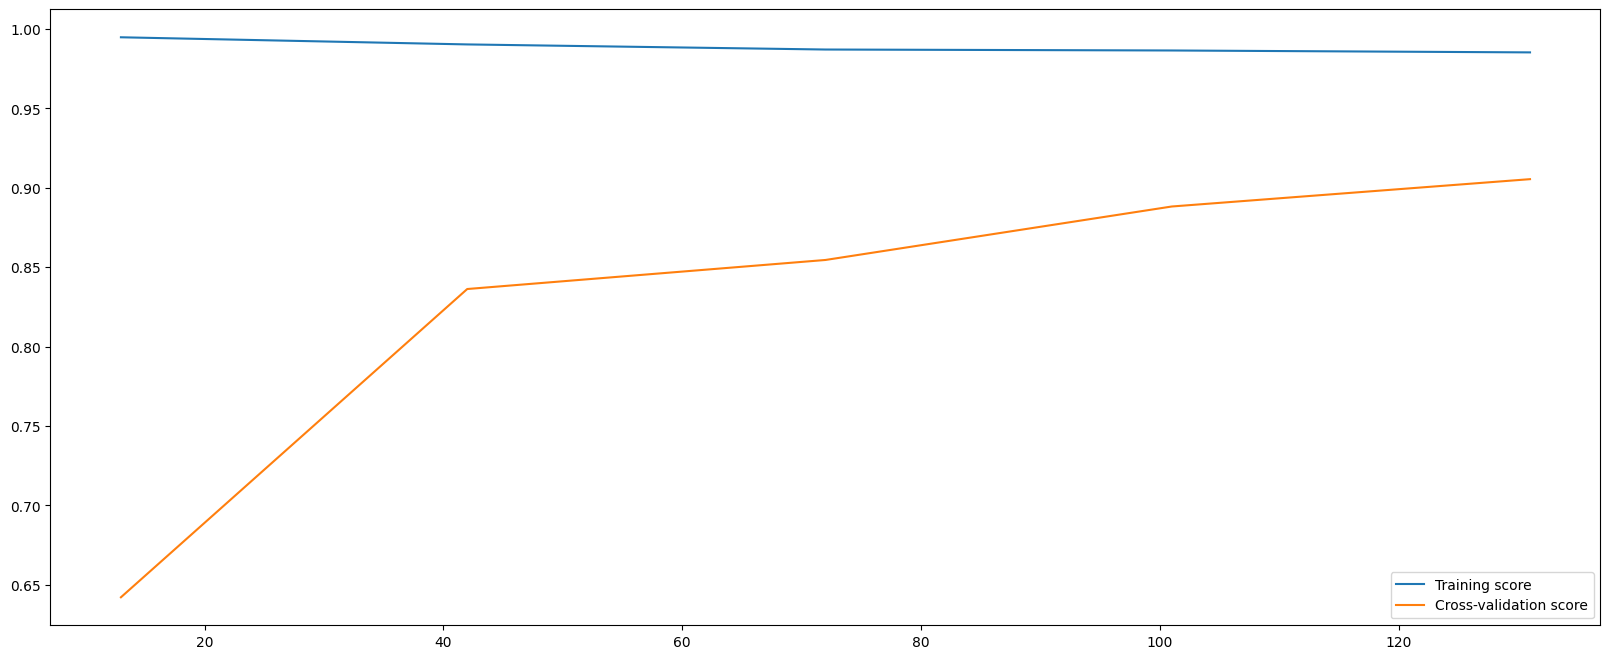

In [14]:
train_sizes, train_scores, test_scores = learning_curve(pipe, X_train, y_train, cv=5, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)


plt.figure(figsize=(20, 8))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.legend()
plt.show()